### Homework Rakamin Trial Class - Mini Case

# Mengukur Performa Penjualan Ritel Online

## Load Data

In [1]:
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_data = pd.read_csv('/content/drive/MyDrive/Rakamin/data.csv')
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


## Section 1

### Create New Feature: Year

In [4]:
df_data['InvoiceDate']=pd.to_datetime(df_data['InvoiceDate'])
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [5]:
year = df_data['InvoiceDate'].dt.year
year.head()

0    2009
1    2009
2    2009
3    2009
4    2009
Name: InvoiceDate, dtype: int64

In [6]:
df_data['year'] = df_data['InvoiceDate'].dt.year
df_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009


### Filtering Data

In [7]:
sales = df_data[(df_data['Quantity']>=1)&(~df_data['Invoice'].str.contains("C",regex=True))]
df_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009


### Create New Feature: Revenue

In [8]:
df_data['Revenue'] = df_data['Quantity'] * df_data['Price']
df_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.0


### Average of Revenue per Year

In [9]:
df = df_data[["year" , "Revenue"]]
df.head()

,year,Revenue
0,2009,83.4
1,2009,81.0
2,2009,81.0
3,2009,100.8
4,2009,30.0


In [10]:
Rata_rata_pertahun = df_data.groupby('year')['Revenue'].mean()
Rata_rata_pertahun.head()

year
2009    17.684777
2010    18.152555
2011    18.018195
Name: Revenue, dtype: float64

<function matplotlib.pyplot.show>

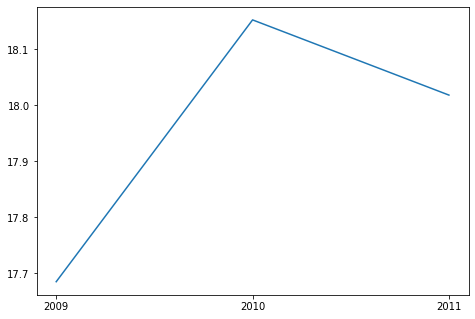

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['2009' , '2010' , '2011' ]
y = [  17.684777 , 18.152555 , 18.018195 ]
ax.plot(x,y)
plt.show

### Interpretation

Dari hasil analisis diatas, dapat diambil kesimpulan sebagai berikut :
1. Tahun 2009 merupakan tahun dengan rata-rata penjualan terendah dari tiga tahun terakhir. Hal ini terlihat dari perolehan rata-rata penjualan sebesar 17,684777 .
2. Perolehan rata-rata penjualan tertinggi berada pada tahun 2010, dengan rata-rata penjualan sebesar 18,152555 . dimana pada tahun 2010 mengalami peningkatan hingga 2,64% dari tahun 2009.
3. Rata-rata penjualan mengalami penurunan di tahun 2011 sebesar 0,74% dengan rata-rata penjualan 18,018195.

## Section 2

### Filtering Data 

#### Customers who finished their purchases

In [12]:
finished = sales[~sales['Customer ID'].isnull()]
finished.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805620 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805620 non-null  object        
 1   StockCode    805620 non-null  object        
 2   Description  805620 non-null  object        
 3   Quantity     805620 non-null  int64         
 4   InvoiceDate  805620 non-null  datetime64[ns]
 5   Price        805620 non-null  float64       
 6   Customer ID  805620 non-null  float64       
 7   Country      805620 non-null  object        
 8   year         805620 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 61.5+ MB


#### Customers who canceled their purchases

In [13]:
Cancel = df_data[df_data['Invoice'].str.contains('C')==True]
Cancel.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year,Revenue
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009,-35.4
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009,-9.9
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009,-17.0
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009,-12.6
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009,-35.4


### Number of Finished and Canceled Transactions Each Year

In [14]:
Count_Finished = finished.groupby('year').count()['Invoice'].reset_index()
Count_Finished

,year,Invoice
0,2009,30761
1,2010,403094
2,2011,371765


In [15]:
Count_Cancel = Cancel.groupby('year').count()['Invoice'].reset_index()
Count_Cancel

,year,Invoice
0,2009,1015
1,2010,9919
2,2011,8560


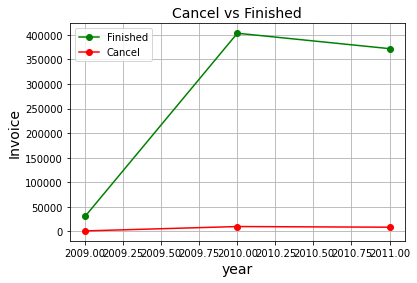

In [20]:
plt.plot(Count_Finished['year'], Count_Finished['Invoice'], color='green', marker='o', Label = 'Finished')
plt.plot(Count_Cancel['year'], Count_Cancel['Invoice'], color='red', marker='o', Label ='Cancel')
plt.title('Cancel vs Finished', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.ylabel('Invoice', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

### Cancellation Rate

In [21]:
Cancellation_Rate =  Count_Cancel['Invoice']/df_data['Invoice'].count()*100
Cancellation = Count_Cancel.assign(Cancellation_Rate =  Count_Cancel['Invoice']/df_data['Invoice'].count()*100)

Cancellation[['year', 'Cancellation_Rate']]

,year,Cancellation_Rate
0,2009,0.095093
1,2010,0.929293
2,2011,0.801970


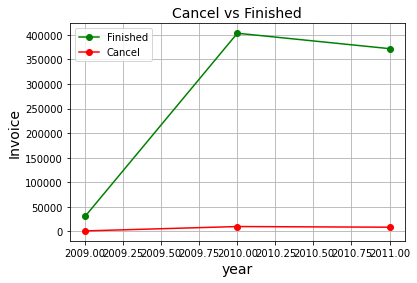

In [22]:
plt.plot(Count_Finished['year'], Count_Finished['Invoice'], color='green', marker='o', Label = 'Finished')
plt.plot(Count_Cancel['year'], Count_Cancel['Invoice'], color='red', marker='o', Label ='Cancel')
plt.title('Cancel vs Finished', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.ylabel('Invoice', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

### Interpretation

Dari hasil analisis diatas, dapat diambil kesimpulan sebagai berikut :
1. Tahun 2009 merupakan transaksi berhasil terendah yang terjadi selama tiga tahun terakhir. Jumlah transaksi berhasil hanya mencapai 30.761 transaksi. Namun, pada tahun 2009 pun angka transaksi gagal merupakan angka terendah dari tiga tahun terakhir yakni hanya mencapai 0,095093% dari total transaksi.
2. Dari tiga tahun terakhir, keberhasilan transaksi penjualan tertinggi berada pada tahun 2010 yakni sebesar 403.094 transaksi berhasil. Dan menjadi total transaksi gagal tertinggi hingga mencapai 0,929293% dari total transaksi.
3. Tahun 2011 terjadi penurunan angka keberhasilan teransaksi dari tahun sebelumnya. Pada tahun 2011 transaksi berhasil hanya mencapai 371.765 transaksi, dan mengalami 8.560 transaksi gagal yaitu 0,801970% dari total transaksi.

Sehingga dapat disimpulkan, dari data transaksi penjualan ritel online selama tiga tahun terakhir di tahun 2009, 2010 dan 2011, transaksi dapat dikatakan berbanding lurus antara transaksi penjualan berhasil dan transaksi gagal yang terjadi dari seluruh transaksi penjualan ritel online.




*   Created by Fitria Febriyanti
*   Connect with me in LinkedIn 
www.linkedin.com/in/fitriafebriyanti

